# Логистическая регрессия

**Цель: Создать модель классификации для предcказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**



## Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных

In [7]:
# Пропущенные значения
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Статистические показатели
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# Дубликаты в данных
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df[df['age'] == 38]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [12]:
# Удаляем дубликаты
df.drop(index = 163, inplace=True)

### Выбросы

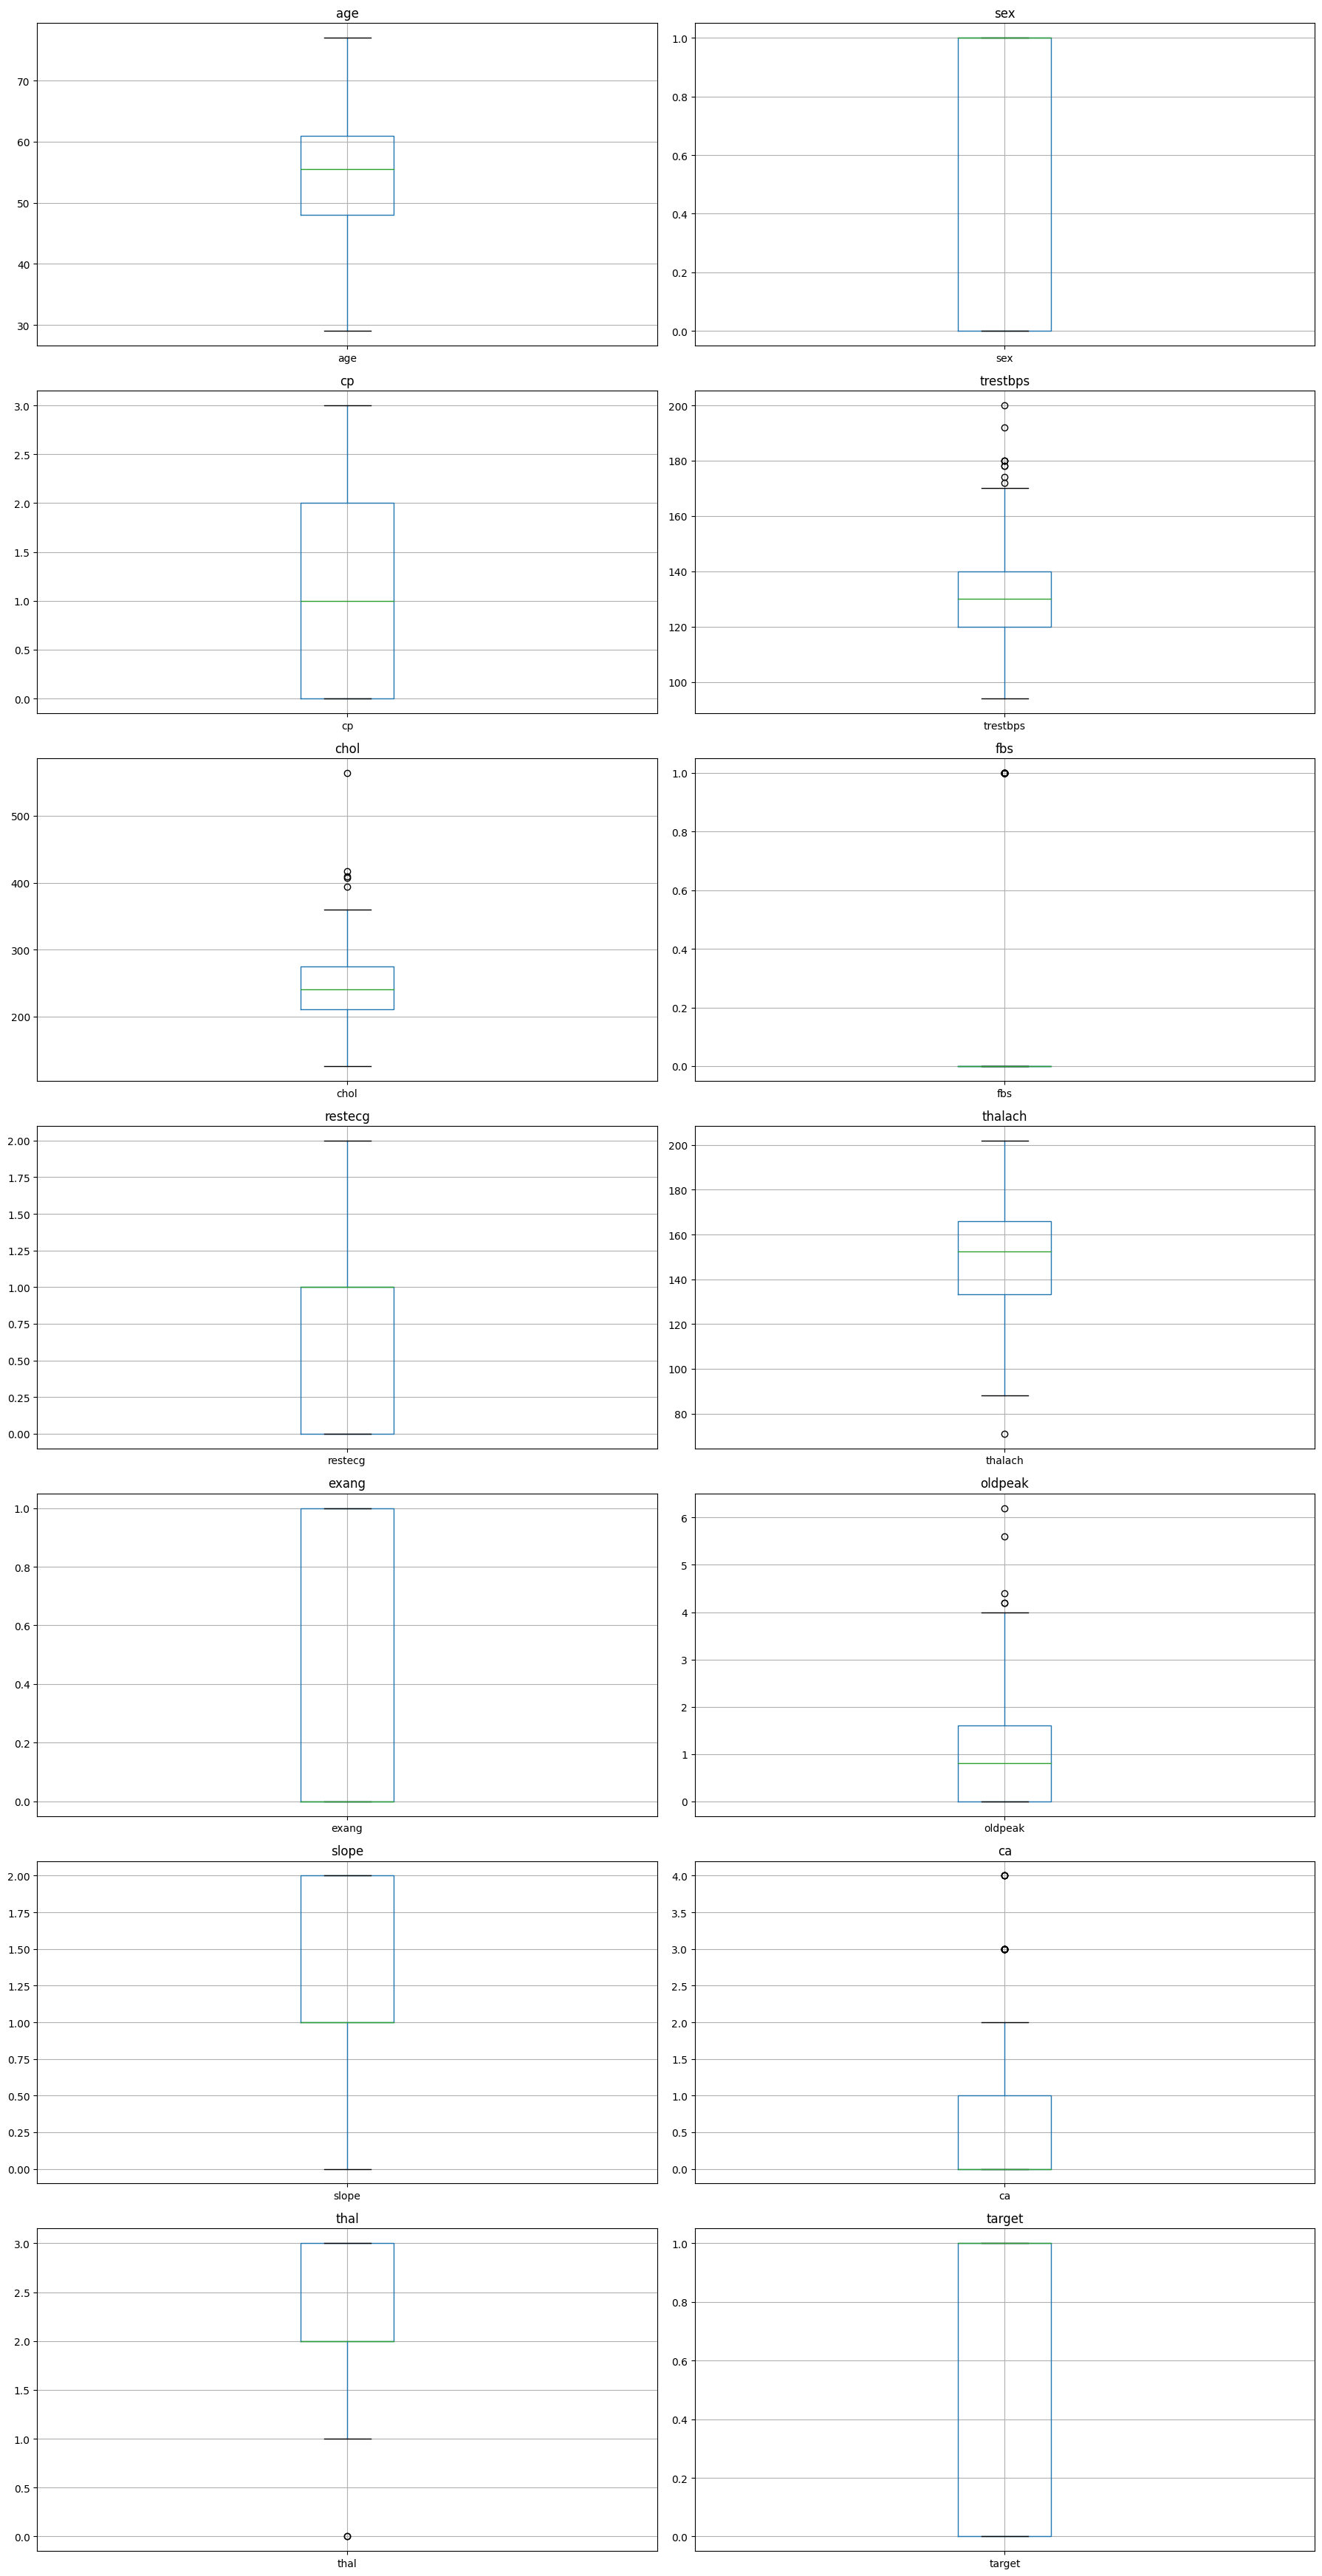

In [13]:
# Количество признаков
n_features = 14

# Количество колонок
n_cols = 2

# Вычисление необходимого количества строк
n_rows = np.ceil(n_features / n_cols).astype(int)

# Создаём место для графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Сглаживание осей для хорошего построения графиков
axes = axes.flatten()

# Построение графиков
for i, feature in enumerate(df):
    df[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [14]:
from scipy import stats

In [15]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # удаление значений, 
                                                    # которые не попали в 3-х сигменный интервал

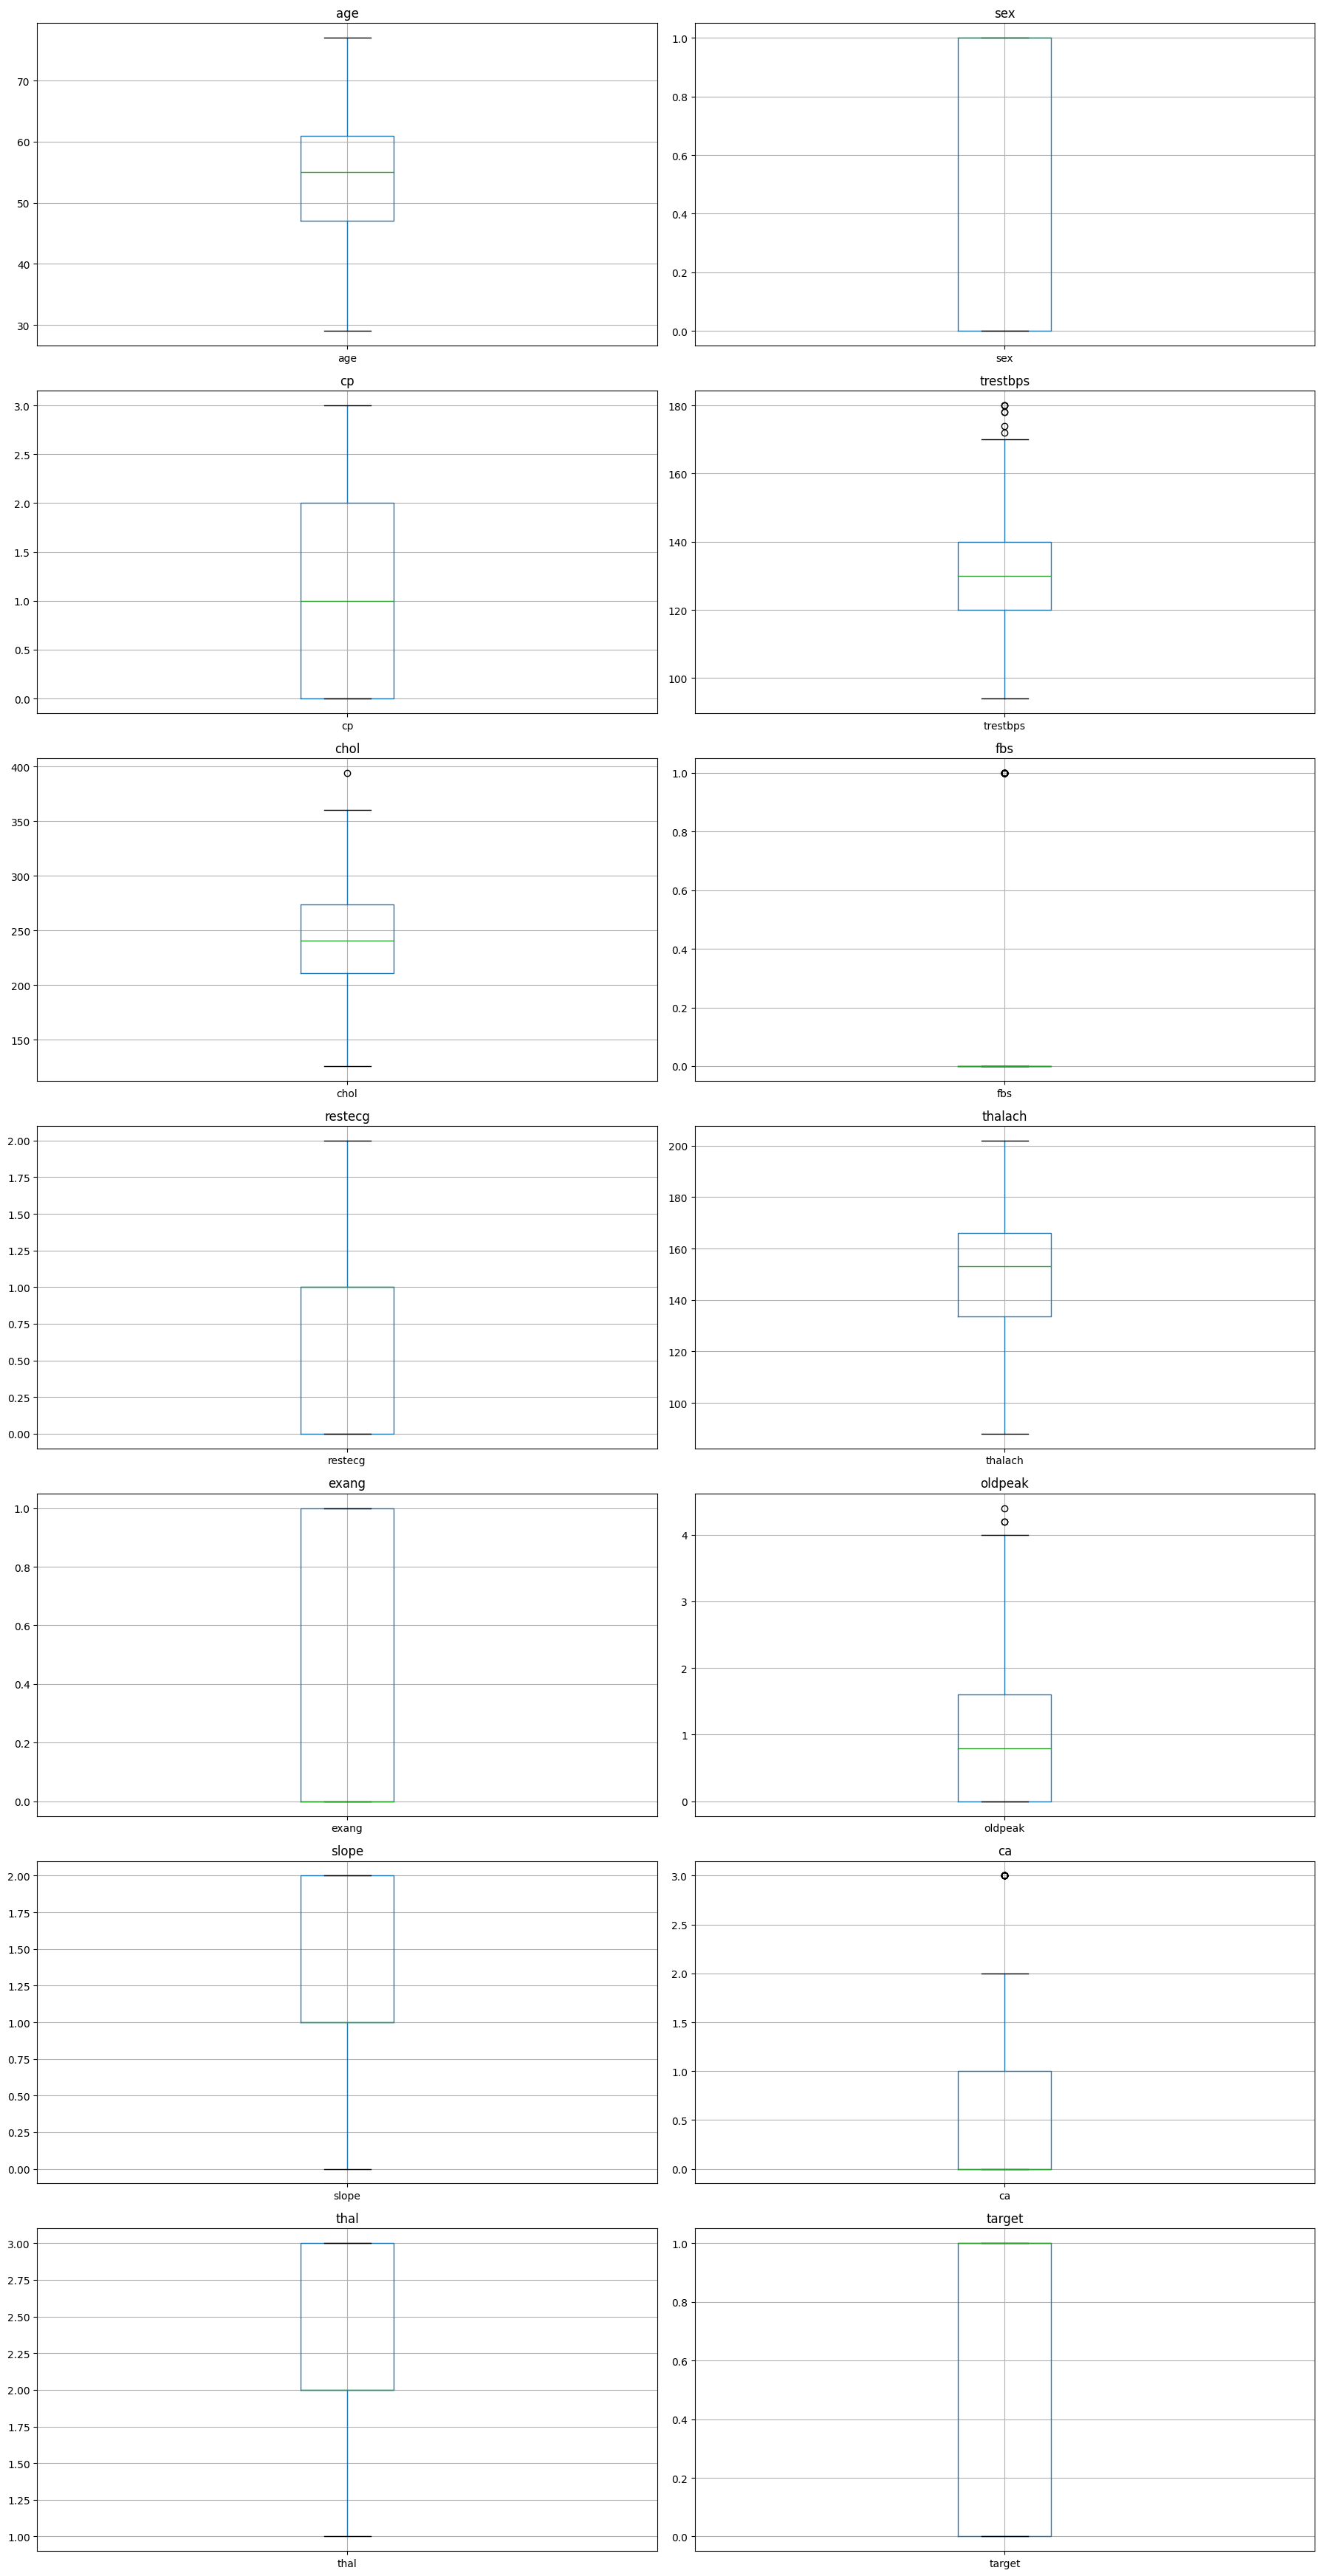

In [16]:
# Количество признаков
n_features = 14

# Количество колонок
n_cols = 2

# Вычисление необходимого количества строк
n_rows = np.ceil(n_features / n_cols).astype(int)

# Создаём место для графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Сглаживание осей для хорошего построения графиков
axes = axes.flatten()

# Построение графиков
for i, feature in enumerate(df):
    df[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

### Визуализация данных

<AxesSubplot: xlabel='target', ylabel='count'>

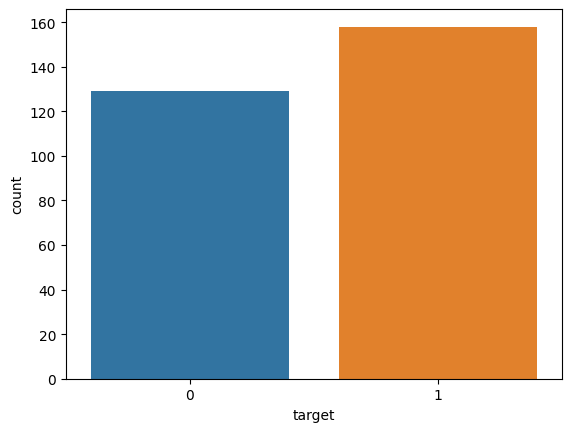

In [17]:
# Подсчёт классов
sns.countplot(data=df, x='target')

**График pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']

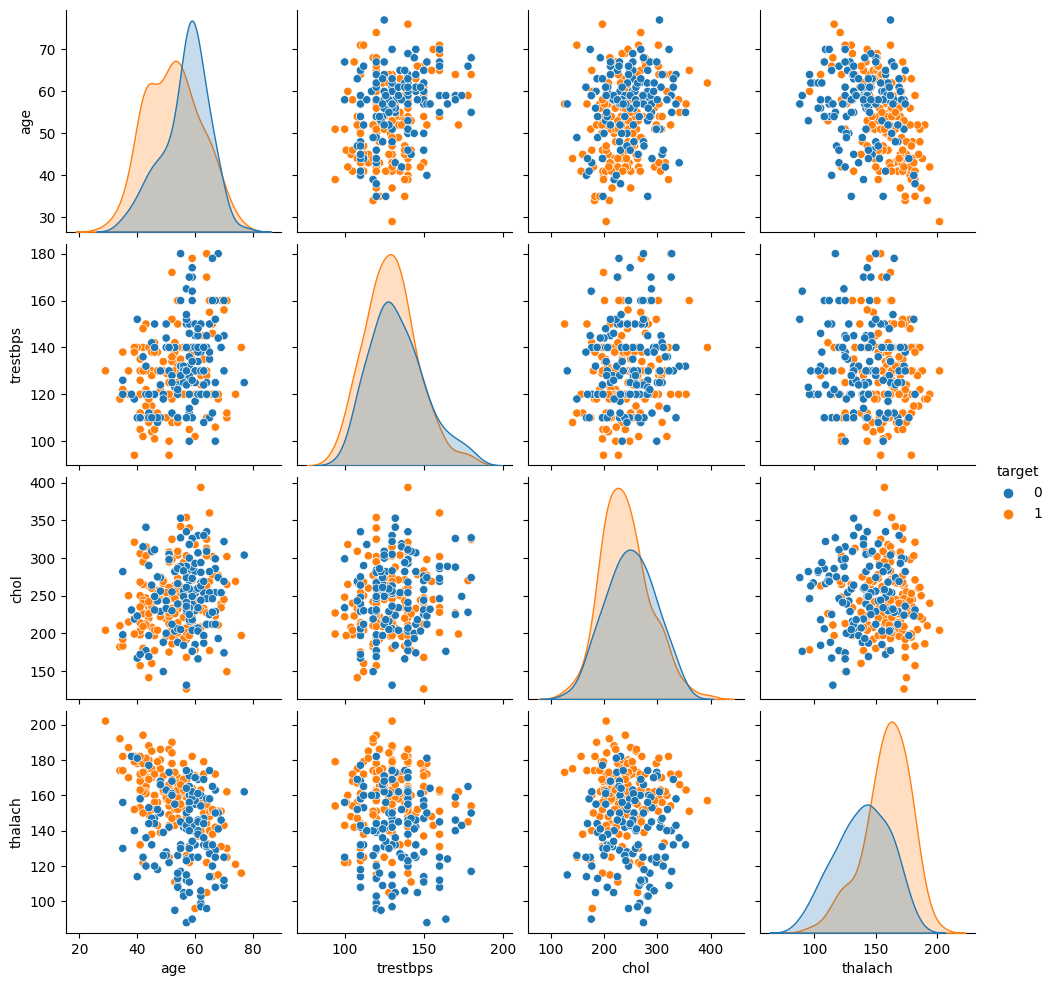

In [18]:
pair_df = df[['age','trestbps', 'chol','thalach','target']]
sns.pairplot(data=pair_df, hue='target')

**Heatmap, показывающий корреляции между всеми колонками.**

<AxesSubplot: >

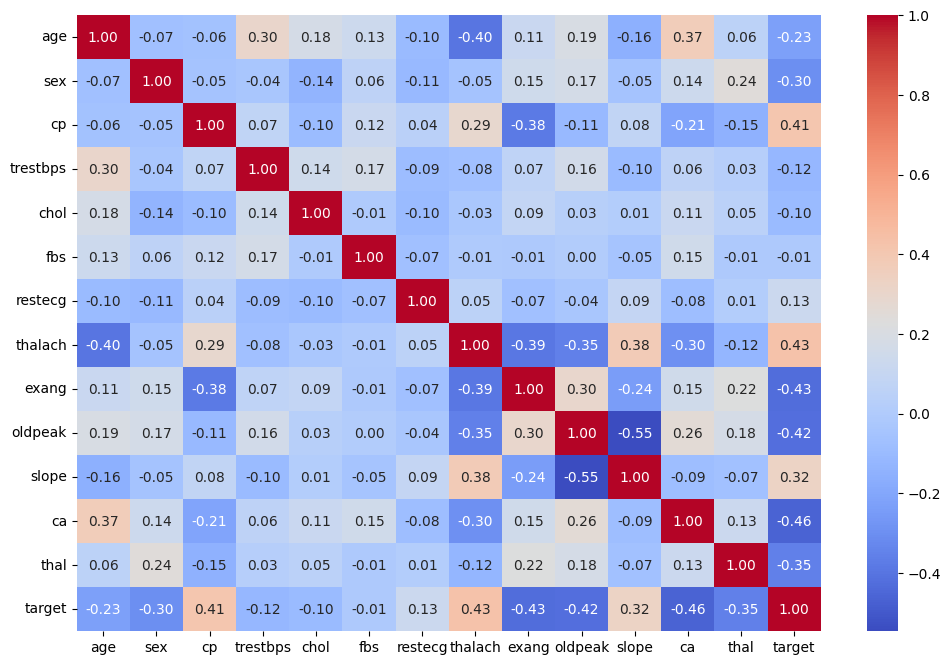

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':10})

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

In [20]:
# Методы для масштабирования и разделения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
# Использование масштабирования данных
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [24]:
# Ввод моделей
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

### GridSearchCV

In [25]:
log_model = LogisticRegression(max_iter=10000, multi_class='ovr', solver='saga')

In [26]:
l1_ratio = np.linspace(0, 1, 30)
C = [10**i for i in range(-4, 5)]
penalty = ['l1', 'l2', 'elasticnet']
params = {'l1_ratio': l1_ratio, 'C': C, 'penalty': penalty}

In [27]:
import warnings
warnings.filterwarnings("ignore") # Для избежания лишних выводов

grid_model = GridSearchCV(log_model, param_grid=params)
grid_model.fit(X_train_scale, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

### LogisticRegressionCV

In [28]:
l1_ratio = np.linspace(0, 1, 30)
C = np.logspace(-4, 4, num=10)
log_cv_model = LogisticRegressionCV(cv=5, Cs=C,
                                    max_iter=10000, solver='saga', multi_class='ovr')

In [29]:
log_cv_model.fit(X_train_scale, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                     cv=5, max_iter=10000, multi_class='ovr', solver='saga')

### Коэффициенты GridSearchCV

In [30]:
# Лучшая модель
grid_model.best_estimator_

LogisticRegression(C=0.1, l1_ratio=0.0, max_iter=10000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [31]:
grid_model.best_params_

{'C': 0.1, 'l1_ratio': 0.0, 'penalty': 'l1'}

### Коэффициенты LogisticRegressionCV

In [32]:
log_cv_model.coef_

array([[ 0.05799311, -0.84121203,  0.76197971, -0.2448267 , -0.27553571,
         0.18206307,  0.18126158,  0.60000662, -0.4900634 , -0.52151153,
         0.44373678, -1.16395945, -0.5996752 ]])

In [33]:
log_cv_model.intercept_

array([0.1073834])

**Barplot для признаков LogisticRegressionCV**

In [34]:
# Сортируем признаки по их значениям
coefs = log_cv_model.coef_[0]
columns = X_train.columns
feature_df = pd.DataFrame({'coefs': coefs, 'columns': columns})
feature_df = feature_df.sort_values(by='coefs')
feature_df

,coefs,columns
11,-1.163959,ca
1,-0.841212,sex
12,-0.599675,thal
9,-0.521512,oldpeak
8,-0.490063,exang
4,-0.275536,chol
3,-0.244827,trestbps
0,0.057993,age
6,0.181262,restecg
5,0.182063,fbs


<AxesSubplot: xlabel='columns', ylabel='coefs'>

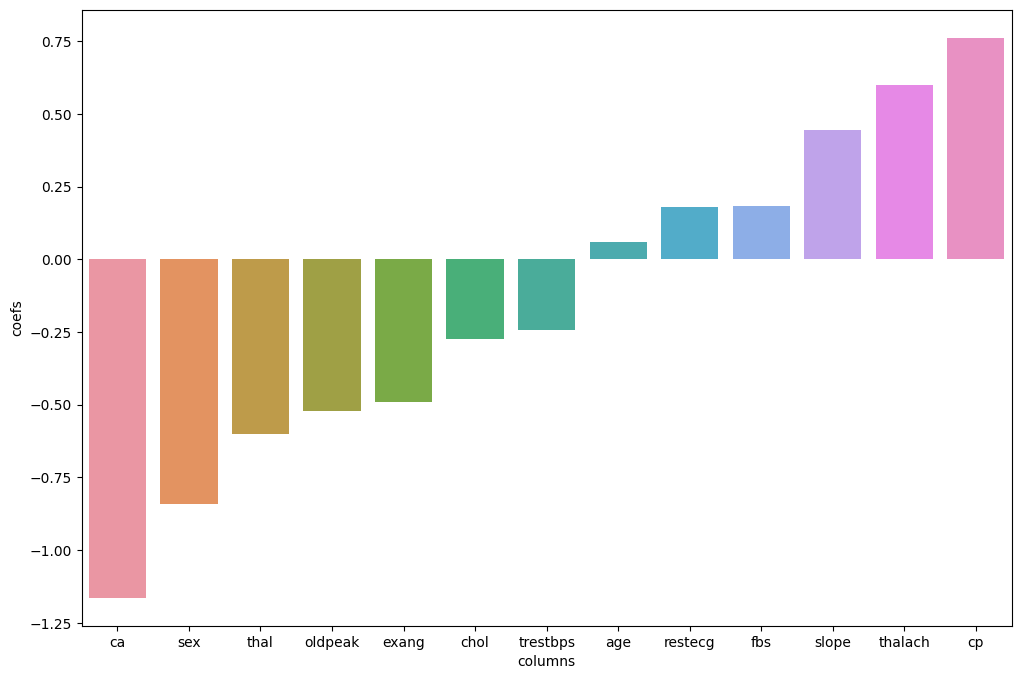

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_df['columns'], y=feature_df['coefs'])

---------

## Оценка моделей

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [37]:
y_grid_pred = grid_model.predict(X_test_scale)
y_cv_pred = log_cv_model.predict(X_test_scale)

**Confusion_matrix**

In [38]:
# GridSearchCV
confusion_matrix(y_test, y_grid_pred)

array([[12,  2],
       [ 2, 13]], dtype=int64)

In [39]:
# LogisticRegressionCV
confusion_matrix(y_test, y_cv_pred)

array([[13,  1],
       [ 2, 13]], dtype=int64)

**Confusion_matrix в виде картинки**

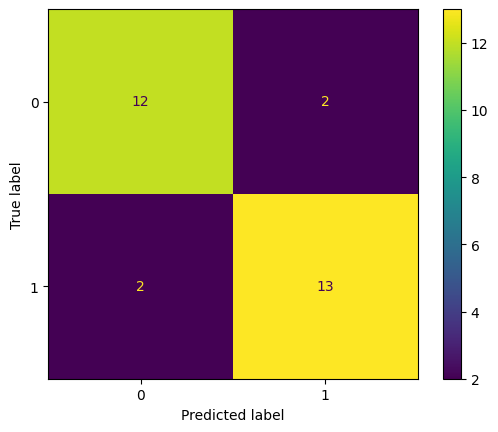

In [40]:
# GridSearchCV
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scale, y_test)

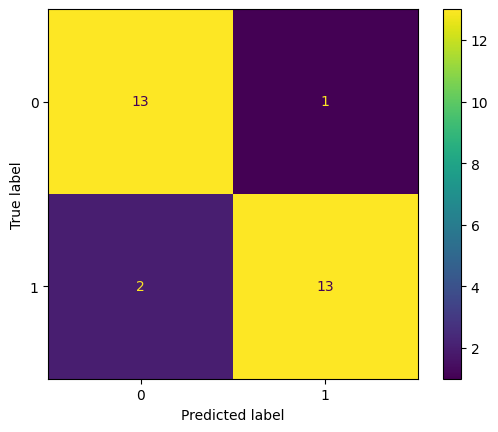

In [41]:
# LogisticRegressionCV
ConfusionMatrixDisplay.from_estimator(log_cv_model, X_test_scale, y_test)

**Метрики классификации**

In [42]:
# GridSearchCV
print(classification_report(y_test, y_grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.87      0.87      0.87        15

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29



In [43]:
# LogisticRegressionCV
print(classification_report(y_test, y_cv_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



### Кривые производительности для GridSearchCV

In [44]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

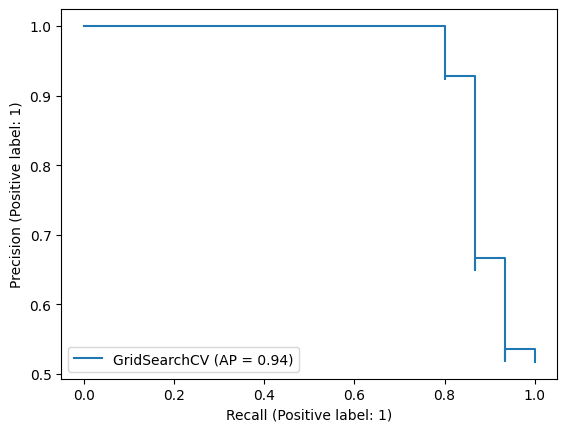

In [45]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test_scale, y_test)

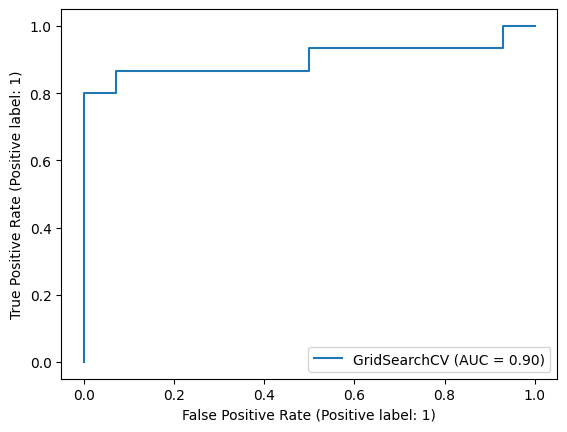

In [46]:
RocCurveDisplay.from_estimator(grid_model, X_test_scale, y_test)

### Кривые производительности для LogisticRegressionCV

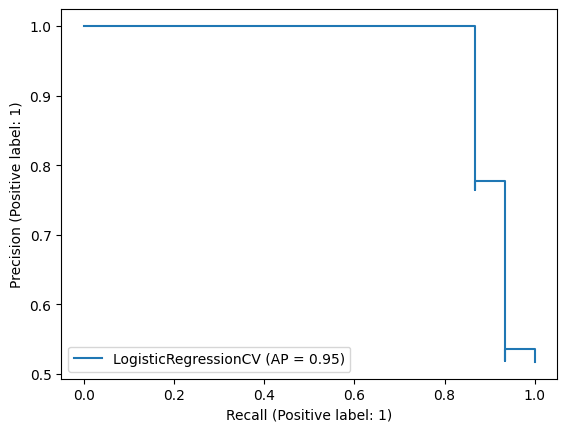

In [47]:
PrecisionRecallDisplay.from_estimator(log_cv_model, X_test_scale, y_test)

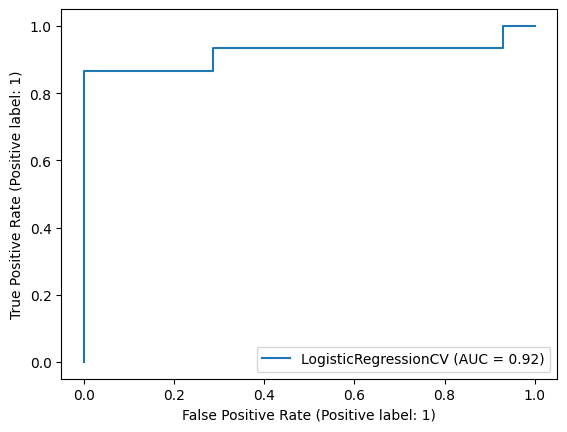

In [48]:
RocCurveDisplay.from_estimator(log_cv_model, X_test_scale, y_test)

**Представим, что в клинику пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [49]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

**Предсказание класса GridSearchCV**

In [50]:
grid_model.predict(patient)

array([1], dtype=int64)

**Предсказание класса LogisticRegressionCV**

In [51]:
log_cv_model.predict(patient)

array([0], dtype=int64)

**Этот пациент должен иметь класс 0, то есть у него нет заболеваний сердца, так что модель LogisticRegressionCV справилась лучше в этой задаче, так как она предсказала класс 0. Цель проекта достигнута.**